In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from altaipony.flarelc import FlareLightCurve
import sys

import matplotlib.pyplot as plt
%matplotlib inline

from funcs import write_flares_to_file, read_custom_aperture_lc
import os

/usr/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
CWD = "/".join(os.getcwd().split("/")[:-1])
paths = pd.read_csv(f"{CWD}/custom_aperture/lclist.txt", header=None)
paths = list(paths[0].values)
len(paths)

191

In [3]:
for i, path in enumerate(paths):
    print(path, "\n")
    path = f"{CWD}/custom_aperture/" + path
    cluster = f"{CWD}/flare_tables/2019_10_27_TESSUCDs"

    flc = read_custom_aperture_lc(path)
    
    print("\nStarted TIC {} ({}), LC nr. {}"
          "\n------------------------------\n".format(flc.targetid, flc.campaign, i))

    # Fix window length -----------------------------------------------------
    #rapid rotators
    TIC = flc.targetid
    if TIC in [29928567, 142052876, 293561794, 
               471012740, 142052876]: 
        w = 5
    #intermediate rotators/ variability time scale / some weird systematics
    elif TIC in [98874143, 272349442, 388903843, 
                 332623751, 328254412, 44892011, 
                 44892011, 117733581, 29780677, 
                 340703996, 395130640, 441000085]:
        w = 25
    # little variability
    elif TIC in [471012740, 125835702, 30101427, 415839928, 
                 398985964, 322568489, 2470992, 1539914,
                 73118477, 117733581]:
        w = 555
    # medium rotators
    elif TIC in [388857263, 471012770, 5630425]:
        w = 55
    # special snowflake
    elif TIC in [44984200]:
        w = 15
    # default: little variablity
    else:
        w = 555
        
    flcd = flc.detrend("savgol", window_length=w)
    
    # ----------------------------------------------------------------------
    flcd.detrended_flux_err[:] = flcd.detrended_flux.std()
    flcd = flcd.find_flares()

    write_flares_to_file(flcd, cluster)

    print("\nFinished TIC {} ({})\n------------------------------\n".format(TIC, flc.campaign))


/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/0ca_tess2019082014090-s0001-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


0ca_tess2019082014090-s0001-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (1), LC nr. 0
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 2 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/1ca_tess2019082014114-s0001-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Create a file named /home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/flare_tables/2019_10_27_TESSUCDs_flares.csv
   ampl_rec cstart  cstop       ed_rec  ed_rec_err istart  istop  \
0  2.421832  81084  81109  1449.582635   11.578788   9519   9544   
1  0.179638  83396  83405   153.030837    9.732029  11803  11812   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    18104.0  1340.073105  1340.107828  29780677         1  
1                    18104.0  1343.284226  1343.296726  29780677         1  

Finished TIC 29780677 (1)
------------------------------

1ca_tess2019082014114-s0001-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (1), LC nr. 1
------------------------------



Found 1 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 1 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/2ca_tess2019082014592-s0001-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop      ed_rec  ed_rec_err istart  istop  \
0  0.090806  77718  77724   29.400003    1.222826   7009   7015   
1  0.448444  90442  90461  176.594194    1.506780  18026  18045   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18104.0  1335.397790  1335.406123  142052876         1  
1                    18104.0  1353.069724  1353.096113  142052876         1  

Finished TIC 142052876 (1)
------------------------------

2ca_tess2019082014592-s0001-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (1), LC nr. 2
------------------------------



Found 1 candidate(s) in the (0,9223) gap.
Found 3 candidate(s) in the (9223,15240) gap.
Found 1 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/3ca_tess2019090408595-s0001-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop     ed_rec  ed_rec_err istart  istop  \
0  0.251065  74599  74605  73.898031    1.497699   4017   4023   
1  0.096914  80980  80987  48.193193    1.775145   9415   9422   
2  0.098535  82713  82716  23.676233    1.173860  11122  11125   
3  0.045819  83273  83276  13.645455    1.276252  11680  11683   
4  0.090382  88092  88097  34.659818    1.523362  15706  15711   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18104.0  1331.064366  1331.072700  167894019         1  
1                    18104.0  1339.926813  1339.936535  167894019         1  
2                    18104.0  1342.333753  1342.337920  167894019         1  
3                    18104.0  1343.111531  1343.115697  167894019         1  
4                    18104.0  1349.804580  1349.811525  167894019         1  

Finished TIC 167894019 (1)
------------------------------

3ca_tess2019090408595-s0001-0000000220429097-0000-s_lc.fits 


Started TIC 

Found 1 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/4ca_tess2019090409262-s0001-0000000234307350-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop     ed_rec  ed_rec_err istart istop  \
0  0.178927  76760  76764  54.980284    3.474734   6100  6104   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18104.0  1334.066651  1334.072207  220429097         1  

Finished TIC 220429097 (1)
------------------------------

4ca_tess2019090409262-s0001-0000000234307350-0000-s_lc.fits 


Started TIC 234307350 (1), LC nr. 4
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/5ca_tess2019082311060-s0001-0000000259901346-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 234307350
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         1  234307350      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 234307350 (1)
------------------------------

5ca_tess2019082311060-s0001-0000000259901346-0000-s_lc.fits 


Started TIC 259901346 (1), LC nr. 5
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/6ca_tess2019082314042-s0001-0000000280801342-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 259901346
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         1  259901346      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 259901346 (1)
------------------------------

6ca_tess2019082314042-s0001-0000000280801342-0000-s_lc.fits 


Started TIC 280801342 (1), LC nr. 6
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/7ca_tess2019082314075-s0001-0000000303978478-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 280801342
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         1  280801342      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 280801342 (1)
------------------------------

7ca_tess2019082314075-s0001-0000000303978478-0000-s_lc.fits 


Started TIC 303978478 (1), LC nr. 7
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/8ca_tess2019082314135-s0001-0000000358108509-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 303978478
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         1  303978478      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 303978478 (1)
------------------------------

8ca_tess2019082314135-s0001-0000000358108509-0000-s_lc.fits 


Started TIC 358108509 (1), LC nr. 8
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 1 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/9ca_tess2019082314154-s0001-0000000389051009-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop       ed_rec  ed_rec_err istart  istop  \
0  1.769133  90504  90519  1087.690566   11.438263  18088  18103   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18104.0  1353.156829  1353.177662  358108509         1  

Finished TIC 358108509 (1)
------------------------------

9ca_tess2019082314154-s0001-0000000389051009-0000-s_lc.fits 


Started TIC 389051009 (1), LC nr. 9
------------------------------



Found 1 candidate(s) in the (0,9223) gap.
Found 1 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/10ca_tess2019100710504-s0001-0000000401984769-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop      ed_rec  ed_rec_err istart istop  \
0  0.237645  75377  75390  154.837798    5.438758   4766  4779   
1  0.166133  81201  81224  265.287614    8.096876   9636  9659   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18104.0  1332.149649  1332.167704  389051009         1  
1                    18104.0  1340.238467  1340.270411  389051009         1  

Finished TIC 389051009 (1)
------------------------------

10ca_tess2019100710504-s0001-0000000401984769-0000-s_lc.fits 


Started TIC 401984769 (1), LC nr. 10
------------------------------



Found 0 candidate(s) in the (0,9223) gap.
Found 0 candidate(s) in the (9223,15240) gap.
Found 0 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/11ca_tess2019090409285-s0002-0000000007150628-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 401984769
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         1  401984769      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 401984769 (1)
------------------------------

11ca_tess2019090409285-s0002-0000000007150628-0000-s_lc.fits 


Started TIC 7150628 (2), LC nr. 11
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/12ca_tess2019090409343-s0002-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 7150628
   Campaign      TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  7150628      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 7150628 (2)
------------------------------

12ca_tess2019090409343-s0002-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (2), LC nr. 12
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 3 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/13ca_tess2019090409390-s0002-0000000034014829-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.172101  102541  102544   30.390348    1.451895  10142  10145   
1  0.078503  106969  106985   97.689348    4.025177  14495  14511   
2  0.119035  109949  109963  120.882284    3.682395  17387  17401   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    18317.0  1369.874451  1369.878618  29780677         2  
1                    18317.0  1376.024417  1376.046639  29780677         2  
2                    18317.0  1380.163272  1380.182717  29780677         2  

Finished TIC 29780677 (2)
------------------------------

13ca_tess2019090409390-s0002-0000000034014829-0000-s_lc.fits 


Started TIC 34014829 (2), LC nr. 13
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/14ca_tess2019090410495-s0002-0000000077041175-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 34014829
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  34014829      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 34014829 (2)
------------------------------

14ca_tess2019090410495-s0002-0000000077041175-0000-s_lc.fits 


Started TIC 77041175 (2), LC nr. 14
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/15ca_tess2019090410525-s0002-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 77041175
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  77041175      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 77041175 (2)
------------------------------

15ca_tess2019090410525-s0002-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (2), LC nr. 15
------------------------------



Found 4 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/16ca_tess2019102509570-s0002-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop      ed_rec  ed_rec_err istart istop  \
0  0.038270  93518  93521   10.875905    1.064152   2295  2298   
1  0.063329  96203  96214   41.776563    2.046999   4945  4955   
2  0.210445  96696  96702   75.219746    1.266589   5405  5411   
3  0.238882  98561  98574  117.388213    1.726939   7238  7251   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18317.0  1357.341872  1357.346039  142052876         2  
1                    18317.0  1361.070978  1361.086256  142052876         2  
2                    18317.0  1361.755689  1361.764022  142052876         2  
3                    18317.0  1364.345922  1364.363977  142052876         2  

Finished TIC 142052876 (2)
------------------------------

16ca_tess2019102509570-s0002-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (2), LC nr. 16
------------------------------



/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/altai.py:265: RuntimeWarning: Mean of empty slice
  flux_model_j[off:upper] = np.nanmean(lc.flux_model[le:ri][[i,k]])
Found 2 candidate(s) in the (0,9226) gap.
Found 1 candidate(s) in the (9226,18316) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/17ca_tess2019090411583-s0002-0000000180724005-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.287469   92802   92817  142.066369    2.296297   1593   1608   
1  0.086888   99466   99473   39.685027    1.877727   8136   8143   
2  0.098779  104054  104057   23.807606    1.217993  11623  11626   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18316.0  1356.346239  1356.367072  167894019         2  
1                    18316.0  1365.601819  1365.611541  167894019         2  
2                    18316.0  1371.974064  1371.978231  167894019         2  

Finished TIC 167894019 (2)
------------------------------

17ca_tess2019090411583-s0002-0000000180724005-0000-s_lc.fits 


Started TIC 180724005 (2), LC nr. 17
------------------------------



Found 1 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/18ca_tess2019090412003-s0002-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop      ed_rec  ed_rec_err istart istop  \
0  0.885612  99179  99188  378.684243    5.503947   7854  7863   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18317.0  1365.208357  1365.220857  180724005         2  

Finished TIC 180724005 (2)
------------------------------

18ca_tess2019090412003-s0002-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (2), LC nr. 18
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 1 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/19ca_tess2019090412043-s0002-0000000234307350-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.267846  108627  108630  53.997074    2.878665  16115  16118   

   total_n_valid_data_points       tstart       tstop        TIC  Campaign  
0                    18317.0  1378.327113  1378.33128  220429097         2  

Finished TIC 220429097 (2)
------------------------------

19ca_tess2019090412043-s0002-0000000234307350-0000-s_lc.fits 


Started TIC 234307350 (2), LC nr. 19
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 1 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/20ca_tess2019090412090-s0002-0000000259901346-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  2.767881  104122  104128  622.145882    12.02915  11692  11698   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18317.0  1372.071068  1372.079401  234307350         2  

Finished TIC 234307350 (2)
------------------------------

20ca_tess2019090412090-s0002-0000000259901346-0000-s_lc.fits 


Started TIC 259901346 (2), LC nr. 20
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/21ca_tess2019090412111-s0002-0000000270218775-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 259901346
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  259901346      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 259901346 (2)
------------------------------

21ca_tess2019090412111-s0002-0000000270218775-0000-s_lc.fits 


Started TIC 270218775 (2), LC nr. 21
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/22ca_tess2019090412202-s0002-0000000281668854-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 270218775
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  270218775      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 270218775 (2)
------------------------------

22ca_tess2019090412202-s0002-0000000281668854-0000-s_lc.fits 


Started TIC 281668854 (2), LC nr. 22
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/23ca_tess2019090412295-s0002-0000000303978478-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 281668854
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  281668854      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 281668854 (2)
------------------------------

23ca_tess2019090412295-s0002-0000000303978478-0000-s_lc.fits 


Started TIC 303978478 (2), LC nr. 23
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/24ca_tess2019102414445-s0002-0000000304392811-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 303978478
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  303978478      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 303978478 (2)
------------------------------

24ca_tess2019102414445-s0002-0000000304392811-0000-s_lc.fits 


Started TIC 304392811 (2), LC nr. 24
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/25ca_tess2019090412562-s0002-0000000340703996-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 304392811
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  304392811      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 304392811 (2)
------------------------------

25ca_tess2019090412562-s0002-0000000340703996-0000-s_lc.fits 


Started TIC 340703996 (2), LC nr. 25
------------------------------



Found 1 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/26ca_tess2019090608014-s0002-0000000358108509-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec cstart  cstop      ed_rec  ed_rec_err istart istop  \
0  0.507411  97099  97108  118.425909    1.063967   5808  5817   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18317.0  1362.320152  1362.332652  340703996         2  

Finished TIC 340703996 (2)
------------------------------

26ca_tess2019090608014-s0002-0000000358108509-0000-s_lc.fits 


Started TIC 358108509 (2), LC nr. 26
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/27ca_tess2019100710515-s0002-0000000401984769-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 358108509
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  358108509      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 358108509 (2)
------------------------------

27ca_tess2019100710515-s0002-0000000401984769-0000-s_lc.fits 


Started TIC 401984769 (2), LC nr. 27
------------------------------



Found 0 candidate(s) in the (0,9227) gap.
Found 0 candidate(s) in the (9227,18317) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/28ca_tess2019090608070-s0003-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 401984769
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         2  401984769      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 401984769 (2)
------------------------------

28ca_tess2019090608070-s0003-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (3), LC nr. 28
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 1 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/29ca_tess2019090608091-s0003-0000000029928567-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.172589  128000  128004  48.330128    1.622831  12753  12757   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    13452.0  1405.233826  1405.239382  29780677         3  

Finished TIC 29780677 (3)
------------------------------

29ca_tess2019090608091-s0003-0000000029928567-0000-s_lc.fits 


Started TIC 29928567 (3), LC nr. 29
------------------------------



Found 3 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/30ca_tess2019090608180-s0003-0000000038314290-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.055615  115182  115187  13.768297    0.266390   1059  1064   
1  0.056007  116129  116137  17.599933    0.320191   1988  1996   
2  0.024868  116792  116795   6.682696    0.237633   2642  2645   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    13452.0  1387.435518  1387.442462  29928567         3  
1                    13452.0  1388.750817  1388.761928  29928567         3  
2                    13452.0  1389.671663  1389.675830  29928567         3  

Finished TIC 29928567 (3)
------------------------------

30ca_tess2019090608180-s0003-0000000038314290-0000-s_lc.fits 


Started TIC 38314290 (3), LC nr. 30
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/31ca_tess2019090608230-s0003-0000000070555405-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 38314290
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  38314290      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 38314290 (3)
------------------------------

31ca_tess2019090608230-s0003-0000000070555405-0000-s_lc.fits 


Started TIC 70555405 (3), LC nr. 31
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/32ca_tess2019090608262-s0003-0000000077111651-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 70555405
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  70555405      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 70555405 (3)
------------------------------

32ca_tess2019090608262-s0003-0000000077111651-0000-s_lc.fits 


Started TIC 77111651 (3), LC nr. 32
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 1 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/33ca_tess2019090608301-s0003-0000000140478472-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  1.460205  125490  125494  582.389262   51.882319  10300  10304   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    13452.0  1401.750889  1401.756445  77111651         3  

Finished TIC 77111651 (3)
------------------------------

33ca_tess2019090608301-s0003-0000000140478472-0000-s_lc.fits 


Started TIC 140478472 (3), LC nr. 33
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/34ca_tess2019090608344-s0003-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 140478472
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  140478472      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 140478472 (3)
------------------------------

34ca_tess2019090608344-s0003-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (3), LC nr. 34
------------------------------



Found 1 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/35ca_tess2019090608400-s0003-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart istop  \
0  2.211293  120942  120949  1851.804058   17.062051   6675  6682   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13452.0  1395.430086  1395.439808  142052876         3  

Finished TIC 142052876 (3)
------------------------------

35ca_tess2019090608400-s0003-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (3), LC nr. 35
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 1 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/36ca_tess2019090608431-s0003-0000000180724005-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0   0.34417  127750  127767  228.428824    3.084919  12505  12522   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13452.0  1404.885461  1404.909073  167894019         3  

Finished TIC 167894019 (3)
------------------------------

36ca_tess2019090608431-s0003-0000000180724005-0000-s_lc.fits 


Started TIC 180724005 (3), LC nr. 36
------------------------------



Found 3 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/37ca_tess2019090608464-s0003-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop        ed_rec  ed_rec_err istart istop  \
0  0.250279  120619  120622     81.744995   10.460609   6370  6373   
1  0.255996  120634  120640    169.532731   14.821083   6384  6390   
2  0.398758  120644  120949  10941.236533  108.093217   6394  6682   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13452.0  1394.986137  1394.990303  180724005         3  
1                    13452.0  1395.006970  1395.015303  180724005         3  
2                    13452.0  1395.020858  1395.444462  180724005         3  

Finished TIC 180724005 (3)
------------------------------

37ca_tess2019090608464-s0003-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (3), LC nr. 37
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/38ca_tess2019090608483-s0003-0000000248350761-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 220429097
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  220429097      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 220429097 (3)
------------------------------

38ca_tess2019090608483-s0003-0000000248350761-0000-s_lc.fits 


Started TIC 248350761 (3), LC nr. 38
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/39ca_tess2019090608520-s0003-0000000308243298-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 248350761
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  248350761      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 248350761 (3)
------------------------------

39ca_tess2019090608520-s0003-0000000308243298-0000-s_lc.fits 


Started TIC 308243298 (3), LC nr. 39
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/40ca_tess2019090608553-s0003-0000000344297533-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 308243298
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  308243298      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 308243298 (3)
------------------------------

40ca_tess2019090608553-s0003-0000000344297533-0000-s_lc.fits 


Started TIC 344297533 (3), LC nr. 40
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/41ca_tess2019090608565-s0003-0000000369555560-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 344297533
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  344297533      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 344297533 (3)
------------------------------

41ca_tess2019090608565-s0003-0000000369555560-0000-s_lc.fits 


Started TIC 369555560 (3), LC nr. 41
------------------------------



Found 0 candidate(s) in the (0,6683) gap.
Found 0 candidate(s) in the (6683,13452) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/42ca_tess2019090609232-s0004-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 369555560
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         3  369555560      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 369555560 (3)
------------------------------

42ca_tess2019090609232-s0004-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (4), LC nr. 42
------------------------------



Found 1 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/43ca_tess2019090609300-s0004-0000000035858101-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.086799  133575  133581  46.534721    3.711937   1472  1478   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    15250.0  1412.976765  1412.985098  29780677         4  

Finished TIC 29780677 (4)
------------------------------

43ca_tess2019090609300-s0004-0000000035858101-0000-s_lc.fits 


Started TIC 35858101 (4), LC nr. 43
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/44ca_tess2019100910402-s0004-0000000044892011-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 35858101
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  35858101      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 35858101 (4)
------------------------------

44ca_tess2019100910402-s0004-0000000044892011-0000-s_lc.fits 


Started TIC 44892011 (4), LC nr. 44
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6277) gap.
Found 0 candidate(s) in the (6277,14958) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/45ca_tess2019090609424-s0004-0000000121024099-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 44892011
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  44892011      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 44892011 (4)
------------------------------

45ca_tess2019090609424-s0004-0000000121024099-0000-s_lc.fits 


Started TIC 121024099 (4), LC nr. 45
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/46ca_tess2019090609482-s0004-0000000141306513-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 121024099
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  121024099      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 121024099 (4)
------------------------------

46ca_tess2019090609482-s0004-0000000141306513-0000-s_lc.fits 


Started TIC 141306513 (4), LC nr. 46
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 1 candidate(s) in the (5375,6569) gap.
Found 2 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/47ca_tess2019090609523-s0004-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  0.756079  140582  140699  6208.399654   63.442529   6451   6568   
1  0.435047  142823  142826   109.059166   10.589617   7474   7477   
2  0.419222  150600  150651  1930.885735   45.108172  15198  15249   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15250.0  1422.713472  1422.875973  141306513         4  
1                    15250.0  1425.825985  1425.830151  141306513         4  
2                    15250.0  1436.627245  1436.698077  141306513         4  

Finished TIC 141306513 (4)
------------------------------

47ca_tess2019090609523-s0004-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (4), LC nr. 47
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/48ca_tess2019090609573-s0004-0000000142944290-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 142052876
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  142052876      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 142052876 (4)
------------------------------

48ca_tess2019090609573-s0004-0000000142944290-0000-s_lc.fits 


Started TIC 142944290 (4), LC nr. 48
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/49ca_tess2019090610040-s0004-0000000143029977-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 142944290
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  142944290      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 142944290 (4)
------------------------------

49ca_tess2019090610040-s0004-0000000143029977-0000-s_lc.fits 


Started TIC 143029977 (4), LC nr. 49
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/50ca_tess2019090610062-s0004-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 143029977
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  143029977      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 143029977 (4)
------------------------------

50ca_tess2019090610062-s0004-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (4), LC nr. 50
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 1 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/51ca_tess2019090610111-s0004-0000000170675902-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart istop  \
0  3.550655  140656  140663  2969.692642   25.738559   6525  6532   

   total_n_valid_data_points      tstart        tstop        TIC  Campaign  
0                    15250.0  1422.81069  1422.820412  167894019         4  

Finished TIC 167894019 (4)
------------------------------

51ca_tess2019090610111-s0004-0000000170675902-0000-s_lc.fits 


Started TIC 170675902 (4), LC nr. 51
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 3 candidate(s) in the (5375,6569) gap.
Found 3 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/52ca_tess2019090610130-s0004-0000000278199738-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  0.125770  140587  140590    42.366504    5.516203   6456   6459   
1  0.183299  140617  140631   227.589482   11.799585   6486   6500   
2  0.242677  140635  140699  1269.933655   25.072854   6504   6568   
3  0.188996  148516  148519    59.344154    5.388901  13127  13130   
4  0.120351  150519  150522    40.941754    5.450890  15130  15133   
5  0.240111  150540  150651  2236.809114   33.838467  15151  15249   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15250.0  1422.718489  1422.722656  170675902         4  
1                    15250.0  1422.760156  1422.779601  170675902         4  
2                    15250.0  1422.785157  1422.874047  170675902         4  
3                    15250.0  1433.731153  1433.735320  170675902         4  
4                    15250.0  1436.513109  1436.517276  170675902         4  
5                    15250.0  1436.542276

Found 0 candidate(s) in the (0,5375) gap.
Found 1 candidate(s) in the (5375,6325) gap.
Found 2 candidate(s) in the (6325,15006) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/53ca_tess2019090610180-s0004-0000000279482950-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  0.248471  140630  140699  1096.204458   17.199984   6255   6324   
1  0.163027  150595  150598    38.541788    3.465292  14949  14952   
2  0.162030  150637  150651   176.617429    7.731119  14991  15005   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15006.0  1422.773745  1422.869576  278199738         4  
1                    15006.0  1436.613838  1436.618005  278199738         4  
2                    15006.0  1436.672171  1436.691615  278199738         4  

Finished TIC 278199738 (4)
------------------------------

53ca_tess2019090610180-s0004-0000000279482950-0000-s_lc.fits 


Started TIC 279482950 (4), LC nr. 53
------------------------------



Found 3 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6313) gap.
Found 0 candidate(s) in the (6313,14994) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/54ca_tess2019090610244-s0004-0000000293561794-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0  0.310351  132727  132730   74.047358    4.721850    632   635   
1  0.957924  134409  134414  262.659785    5.214301   2278  2283   
2  1.560031  136554  136561  332.530987    4.958844   4396  4402   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14994.0  1411.802828  1411.806994  279482950         4  
1                    14994.0  1414.139021  1414.145966  279482950         4  
2                    14994.0  1417.118276  1417.127998  279482950         4  

Finished TIC 279482950 (4)
------------------------------

54ca_tess2019090610244-s0004-0000000293561794-0000-s_lc.fits 


Started TIC 293561794 (4), LC nr. 54
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 2 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/55ca_tess2019090610310-s0004-0000000308243298-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.145023  147808  147811   38.201788    3.344306  12432  12435   
1  0.166125  148029  148038  123.603857    5.884399  12653  12662   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15250.0  1432.749627  1432.753793  293561794         4  
1                    15250.0  1433.056559  1433.069059  293561794         4  

Finished TIC 293561794 (4)
------------------------------

55ca_tess2019090610310-s0004-0000000308243298-0000-s_lc.fits 


Started TIC 308243298 (4), LC nr. 55
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6525) gap.
Found 0 candidate(s) in the (6525,15206) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/56ca_tess2019090610330-s0004-0000000328254412-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 308243298
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  308243298      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 308243298 (4)
------------------------------

56ca_tess2019090610330-s0004-0000000328254412-0000-s_lc.fits 


Started TIC 328254412 (4), LC nr. 56
------------------------------



Found 1 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 1 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/57ca_tess2019090610345-s0004-0000000328401671-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.343309  137225  137242  284.737864    9.279344   5056   5073   
1  0.339788  148745  148757  259.090849    7.767339  13356  13368   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15250.0  1418.051167  1418.074779  328254412         4  
1                    15250.0  1434.051215  1434.067882  328254412         4  

Finished TIC 328254412 (4)
------------------------------

57ca_tess2019090610345-s0004-0000000328401671-0000-s_lc.fits 


Started TIC 328401671 (4), LC nr. 57
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/58ca_tess2019090610383-s0004-0000000365369408-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 328401671
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  328401671      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 328401671 (4)
------------------------------

58ca_tess2019090610383-s0004-0000000365369408-0000-s_lc.fits 


Started TIC 365369408 (4), LC nr. 58
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6430) gap.
Found 0 candidate(s) in the (6430,15111) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/59ca_tess2019090610403-s0004-0000000406479664-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 365369408
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  365369408      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 365369408 (4)
------------------------------

59ca_tess2019090610403-s0004-0000000406479664-0000-s_lc.fits 


Started TIC 406479664 (4), LC nr. 59
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 1 candidate(s) in the (5375,6569) gap.
Found 2 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/60ca_tess2019090610412-s0004-0000000420001446-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  0.377671  140603  140699  2804.777577   43.975617   6472   6568   
1  0.196544  150591  150598   147.546378   12.702459  15189  15196   
2  0.295484  150604  150651  1232.095629   32.939850  15202  15249   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15250.0  1422.741817  1422.875152  406479664         4  
1                    15250.0  1436.614020  1436.623742  406479664         4  
2                    15250.0  1436.632075  1436.697352  406479664         4  

Finished TIC 406479664 (4)
------------------------------

60ca_tess2019090610412-s0004-0000000420001446-0000-s_lc.fits 


Started TIC 420001446 (4), LC nr. 60
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 1 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/61ca_tess2019090610424-s0004-0000000441519239-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.039285  147741  147744  10.232216    1.011249  12365  12368   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15250.0  1432.656759  1432.660925  420001446         4  

Finished TIC 420001446 (4)
------------------------------

61ca_tess2019090610424-s0004-0000000441519239-0000-s_lc.fits 


Started TIC 441519239 (4), LC nr. 61
------------------------------



Found 0 candidate(s) in the (0,5375) gap.
Found 0 candidate(s) in the (5375,6569) gap.
Found 0 candidate(s) in the (6569,15250) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/62ca_tess2019090610453-s0005-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 441519239
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         4  441519239      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 441519239 (4)
------------------------------

62ca_tess2019090610453-s0005-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (5), LC nr. 62
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 2 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/63ca_tess2019090610494-s0005-0000000044892011-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.097221  163335  163339  26.499762    2.122721  10303  10307   
1  0.359718  166514  166519  79.685935    1.935282  13468  13473   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    16947.0  1454.309407  1454.314962  29780677         5  
1                    16947.0  1458.724614  1458.731558  29780677         5  

Finished TIC 29780677 (5)
------------------------------

63ca_tess2019090610494-s0005-0000000044892011-0000-s_lc.fits 


Started TIC 44892011 (5), LC nr. 63
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/64ca_tess2019090610505-s0005-0000000077842052-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 44892011
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  44892011      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 44892011 (5)
------------------------------

64ca_tess2019090610505-s0005-0000000077842052-0000-s_lc.fits 


Started TIC 77842052 (5), LC nr. 64
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/65ca_tess2019090610534-s0005-0000000077959225-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 77842052
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  77842052      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 77842052 (5)
------------------------------

65ca_tess2019090610534-s0005-0000000077959225-0000-s_lc.fits 


Started TIC 77959225 (5), LC nr. 65
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/66ca_tess2019090610560-s0005-0000000117733072-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 77959225
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  77959225      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 77959225 (5)
------------------------------

66ca_tess2019090610560-s0005-0000000117733072-0000-s_lc.fits 


Started TIC 117733072 (5), LC nr. 66
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/67ca_tess2019090610575-s0005-0000000117733581-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 117733072
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  117733072      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 117733072 (5)
------------------------------

67ca_tess2019090610575-s0005-0000000117733581-0000-s_lc.fits 


Started TIC 117733581 (5), LC nr. 67
------------------------------



Found 1 candidate(s) in the (0,8322) gap.
Found 1 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/68ca_tess2019090611004-s0005-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.221889  158786  158789   63.261002    3.369820   6859   6862   
1  0.747674  163308  163312  155.020022    3.248991  10276  10280   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1447.996104  1448.000270  117733581         5  
1                    16947.0  1454.276639  1454.282195  117733581         5  

Finished TIC 117733581 (5)
------------------------------

68ca_tess2019090611004-s0005-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (5), LC nr. 68
------------------------------



Found 2 candidate(s) in the (0,8261) gap.
Found 2 candidate(s) in the (8261,16886) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/69ca_tess2019090611060-s0005-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.025477  152009  152012   6.132521    0.391851     47     50   
1  0.017326  159470  159473   5.130913    0.409688   7482   7485   
2  0.026981  164326  164339  23.832878    0.818741  11226  11239   
3  0.028994  167643  167651  18.023493    0.632129  14536  14544   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16886.0  1438.578121  1438.582287  142052876         5  
1                    16886.0  1448.940559  1448.944725  142052876         5  
2                    16886.0  1455.684971  1455.703027  142052876         5  
3                    16886.0  1460.291909  1460.303020  142052876         5  

Finished TIC 142052876 (5)
------------------------------

69ca_tess2019090611060-s0005-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (5), LC nr. 69
------------------------------



Found 1 candidate(s) in the (0,8322) gap.
Found 2 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/70ca_tess2019090611095-s0005-0000000170675902-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.205487  154531  154540  81.127439    1.785970   2620   2629   
1  0.258908  167796  167800  45.833228    1.011974  14750  14754   
2  0.227960  168320  168327  65.674111    1.448414  15267  15274   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1442.081809  1442.094309  167894019         5  
1                    16947.0  1460.505701  1460.511256  167894019         5  
2                    16947.0  1461.233489  1461.243211  167894019         5  

Finished TIC 167894019 (5)
------------------------------

70ca_tess2019090611095-s0005-0000000170675902-0000-s_lc.fits 


Started TIC 170675902 (5), LC nr. 70
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/71ca_tess2019102510482-s0005-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 170675902
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  170675902      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 170675902 (5)
------------------------------

71ca_tess2019102510482-s0005-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (5), LC nr. 71
------------------------------



Found 1 candidate(s) in the (0,8322) gap.
Found 1 candidate(s) in the (8322,16911) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/72ca_tess2019090611163-s0005-0000000279482950-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.123850  152637  152640  26.721848    2.209473    736    739   
1  0.183707  163141  163144  39.688846    2.171563  10073  10076   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16911.0  1439.452361  1439.456528  220429097         5  
1                    16911.0  1454.041132  1454.045298  220429097         5  

Finished TIC 220429097 (5)
------------------------------

72ca_tess2019090611163-s0005-0000000279482950-0000-s_lc.fits 


Started TIC 279482950 (5), LC nr. 72
------------------------------



Found 1 candidate(s) in the (0,8322) gap.
Found 2 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/73ca_tess2019090611183-s0005-0000000284678097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.431906  159134  159141  153.705978    3.559536   7207   7214   
1  0.358958  162470  162476  132.827971    3.566976   9438   9444   
2  0.061799  167351  167354   21.185896    2.843189  14305  14308   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1448.479556  1448.489278  279482950         5  
1                    16947.0  1453.112801  1453.121134  279482950         5  
2                    16947.0  1459.891778  1459.895944  279482950         5  

Finished TIC 279482950 (5)
------------------------------

73ca_tess2019090611183-s0005-0000000284678097-0000-s_lc.fits 


Started TIC 284678097 (5), LC nr. 73
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16946) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/74ca_tess2019090611242-s0005-0000000298907057-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 284678097
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  284678097      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 284678097 (5)
------------------------------

74ca_tess2019090611242-s0005-0000000298907057-0000-s_lc.fits 


Started TIC 298907057 (5), LC nr. 74
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 3 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/75ca_tess2019090611284-s0005-0000000332623751-0000-s_lc.fits' mode='rb' closefd=True>
  


    ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0   0.886640  161378  161384   531.428908   37.354025   8346   8352   
1  12.459090  162284  162299  4768.579280   37.543402   9252   9267   
2   1.422115  166606  166609   360.409151   25.621022  13560  13563   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1451.596630  1451.604963  298907057         5  
1                    16947.0  1452.854969  1452.875802  298907057         5  
2                    16947.0  1458.857714  1458.861881  298907057         5  

Finished TIC 298907057 (5)
------------------------------

75ca_tess2019090611284-s0005-0000000332623751-0000-s_lc.fits 


Started TIC 332623751 (5), LC nr. 75
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 2 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/76ca_tess2019090611304-s0005-0000000396862832-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.219241  166808  166813  51.985990    1.456202  13762  13767   
1  0.064789  168478  168481  18.194038    1.407004  15425  15428   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1459.137820  1459.144764  332623751         5  
1                    16947.0  1461.457198  1461.461364  332623751         5  

Finished TIC 332623751 (5)
------------------------------

76ca_tess2019090611304-s0005-0000000396862832-0000-s_lc.fits 


Started TIC 396862832 (5), LC nr. 76
------------------------------



Found 1 candidate(s) in the (0,8322) gap.
Found 1 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/77ca_tess2019090611333-s0005-0000000401945077-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.343862  159302  159309  96.484650    1.828423   7375   7382   
1  0.328821  168629  168635  93.308545    1.821246  15576  15582   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1448.713744  1448.723466  396862832         5  
1                    16947.0  1461.667708  1461.676041  396862832         5  

Finished TIC 396862832 (5)
------------------------------

77ca_tess2019090611333-s0005-0000000401945077-0000-s_lc.fits 


Started TIC 401945077 (5), LC nr. 77
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 0 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/78ca_tess2019090611381-s0005-0000000416744592-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 401945077
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         5  401945077      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 401945077 (5)
------------------------------

78ca_tess2019090611381-s0005-0000000416744592-0000-s_lc.fits 


Started TIC 416744592 (5), LC nr. 78
------------------------------



Found 0 candidate(s) in the (0,8322) gap.
Found 1 candidate(s) in the (8322,16947) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/79ca_tess2019090612002-s0006-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  0.383233  163841  163928  2879.791081   31.178359  10802  10889   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16947.0  1455.017753  1455.138583  416744592         5  

Finished TIC 416744592 (5)
------------------------------

79ca_tess2019090612002-s0006-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (6), LC nr. 79
------------------------------



Found 1 candidate(s) in the (0,6238) gap.
Found 1 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/80ca_tess2019090612025-s0006-0000000053603145-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.629495  174255  174266  332.332411    5.566510    859    870   
1  0.433582  184815  184819  108.920955    3.314883  10360  10364   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    14596.0  1469.475828  1469.491105  29780677         6  
1                    14596.0  1484.142286  1484.147841  29780677         6  

Finished TIC 29780677 (6)
------------------------------

80ca_tess2019090612025-s0006-0000000053603145-0000-s_lc.fits 


Started TIC 53603145 (6), LC nr. 80
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/81ca_tess2019090612125-s0006-0000000077959225-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 53603145
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  53603145      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 53603145 (6)
------------------------------

81ca_tess2019090612125-s0006-0000000077959225-0000-s_lc.fits 


Started TIC 77959225 (6), LC nr. 81
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/82ca_tess2019090612211-s0006-0000000130414729-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 77959225
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  77959225      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 77959225 (6)
------------------------------

82ca_tess2019090612211-s0006-0000000130414729-0000-s_lc.fits 


Started TIC 130414729 (6), LC nr. 82
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/83ca_tess2019090612435-s0006-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 130414729
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  130414729      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 130414729 (6)
------------------------------

83ca_tess2019090612435-s0006-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (6), LC nr. 83
------------------------------



Found 1 candidate(s) in the (0,6213) gap.
Found 0 candidate(s) in the (6213,14571) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/84ca_tess2019100910473-s0006-0000000144776281-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0   0.04798  178287  178291  14.705482    0.878241   4839  4843   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14571.0  1475.075253  1475.080809  142052876         6  

Finished TIC 142052876 (6)
------------------------------

84ca_tess2019100910473-s0006-0000000144776281-0000-s_lc.fits 


Started TIC 144776281 (6), LC nr. 84
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/85ca_tess2019090612462-s0006-0000000156735150-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 144776281
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  144776281      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 144776281 (6)
------------------------------

85ca_tess2019090612462-s0006-0000000156735150-0000-s_lc.fits 


Started TIC 156735150 (6), LC nr. 85
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 2 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/86ca_tess2019090613195-s0006-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.114260  184071  184083  74.882302    2.163008   9616   9628   
1  0.065734  187004  187010  32.309241    1.590455  12542  12548   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14596.0  1483.115063  1483.131730  156735150         6  
1                    14596.0  1487.188604  1487.196937  156735150         6  

Finished TIC 156735150 (6)
------------------------------

86ca_tess2019090613195-s0006-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (6), LC nr. 86
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/87ca_tess2019090613212-s0006-0000000220146061-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 167894019
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  167894019      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 167894019 (6)
------------------------------

87ca_tess2019090613212-s0006-0000000220146061-0000-s_lc.fits 


Started TIC 220146061 (6), LC nr. 87
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 1 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/88ca_tess2019090613243-s0006-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart istop  \
0    0.2458  182736  182782  1053.018489     23.8463   8288  8327   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14596.0  1481.260903  1481.324792  220146061         6  

Finished TIC 220146061 (6)
------------------------------

88ca_tess2019090613243-s0006-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (6), LC nr. 88
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/89ca_tess2019090613261-s0006-0000000388903843-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 220429097
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  220429097      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 220429097 (6)
------------------------------

89ca_tess2019090613261-s0006-0000000388903843-0000-s_lc.fits 


Started TIC 388903843 (6), LC nr. 89
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/90ca_tess2019090613464-s0006-0000000410898932-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 388903843
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  388903843      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 388903843 (6)
------------------------------

90ca_tess2019090613464-s0006-0000000410898932-0000-s_lc.fits 


Started TIC 410898932 (6), LC nr. 90
------------------------------



Found 0 candidate(s) in the (0,6238) gap.
Found 0 candidate(s) in the (6238,14596) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/91ca_tess2019102415132-s0007-0000000000926898-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 410898932
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         6  410898932      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 410898932 (6)
------------------------------

91ca_tess2019102415132-s0007-0000000000926898-0000-s_lc.fits 


Started TIC 926898 (7), LC nr. 91
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/92ca_tess2019090613562-s0007-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 926898
   Campaign     TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  926898      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 926898 (7)
------------------------------

92ca_tess2019090613562-s0007-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (7), LC nr. 92
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/93ca_tess2019090614093-s0007-0000000053603145-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 29780677
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  29780677      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 29780677 (7)
------------------------------

93ca_tess2019090614093-s0007-0000000053603145-0000-s_lc.fits 


Started TIC 53603145 (7), LC nr. 93
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/94ca_tess2019090614200-s0007-0000000121204333-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 53603145
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  53603145      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 53603145 (7)
------------------------------

94ca_tess2019090614200-s0007-0000000121204333-0000-s_lc.fits 


Started TIC 121204333 (7), LC nr. 94
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/95ca_tess2019090614254-s0007-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 121204333
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  121204333      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 121204333 (7)
------------------------------

95ca_tess2019090614254-s0007-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (7), LC nr. 95
------------------------------



Found 2 candidate(s) in the (0,8190) gap.
Found 1 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/96ca_tess2019090614335-s0007-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.133399  191115  191125  64.505639    1.039535    908    918   
1  0.036732  191598  191601   7.942362    0.642229   1391   1394   
2  0.145603  204013  204021  45.891229    0.865357  12576  12584   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16362.0  1492.891994  1492.905883  142052876         7  
1                    16362.0  1493.562834  1493.567000  142052876         7  
2                    16362.0  1510.806078  1510.817189  142052876         7  

Finished TIC 142052876 (7)
------------------------------

96ca_tess2019090614335-s0007-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (7), LC nr. 96
------------------------------



Found 2 candidate(s) in the (0,8190) gap.
Found 1 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/97ca_tess2019090614361-s0007-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.161847  196981  196991  128.961202    6.020042   6758   6761   
1  0.547896  197802  197810  160.716557    2.720000   7572   7580   
2  0.243762  202895  202904   97.268135    3.336381  11458  11467   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16362.0  1501.040876  1501.054765  167894019         7  
1                    16362.0  1502.181161  1502.192272  167894019         7  
2                    16362.0  1509.254820  1509.267320  167894019         7  

Finished TIC 167894019 (7)
------------------------------

97ca_tess2019090614361-s0007-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (7), LC nr. 97
------------------------------



Found 0 candidate(s) in the (0,8188) gap.
Found 2 candidate(s) in the (8188,16358) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/98ca_tess2019090614384-s0007-0000000278199738-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.236829  205369  205372   58.705966    2.855751  13921  13924   
1  0.257956  206975  206985  142.262440    4.978663  15519  15529   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16358.0  1512.690124  1512.694291  220429097         7  
1                    16358.0  1514.920632  1514.934521  220429097         7  

Finished TIC 220429097 (7)
------------------------------

98ca_tess2019090614384-s0007-0000000278199738-0000-s_lc.fits 


Started TIC 278199738 (7), LC nr. 98
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/99ca_tess2019100910491-s0007-0000000289113766-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 278199738
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  278199738      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 278199738 (7)
------------------------------

99ca_tess2019100910491-s0007-0000000289113766-0000-s_lc.fits 


Started TIC 289113766 (7), LC nr. 99
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/100ca_tess2019090910225-s0007-0000000318801864-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 289113766
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  289113766      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 289113766 (7)
------------------------------

100ca_tess2019090910225-s0007-0000000318801864-0000-s_lc.fits 


Started TIC 318801864 (7), LC nr. 100
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/101ca_tess2019090910464-s0007-0000000366567664-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 318801864
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  318801864      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 318801864 (7)
------------------------------

101ca_tess2019090910464-s0007-0000000366567664-0000-s_lc.fits 


Started TIC 366567664 (7), LC nr. 101
------------------------------



Found 1 candidate(s) in the (0,8190) gap.
Found 1 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/102ca_tess2019090910530-s0007-0000000410898932-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.166741  194490  194493  29.960243    1.311066   4274   4277   
1  0.213679  202907  202912  47.355015    1.565974  11470  11475   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    16362.0  1497.585884  1497.590051  366567664         7  
1                    16362.0  1509.276328  1509.283273  366567664         7  

Finished TIC 366567664 (7)
------------------------------

102ca_tess2019090910530-s0007-0000000410898932-0000-s_lc.fits 


Started TIC 410898932 (7), LC nr. 102
------------------------------



Found 0 candidate(s) in the (0,8190) gap.
Found 0 candidate(s) in the (8190,16362) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/103ca_tess2019102415201-s0008-0000000000926898-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 410898932
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         7  410898932      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 410898932 (7)
------------------------------

103ca_tess2019102415201-s0008-0000000000926898-0000-s_lc.fits 


Started TIC 926898 (8), LC nr. 103
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/104ca_tess2019090911104-s0008-0000000007975441-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 926898
   Campaign     TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  926898      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 926898 (8)
------------------------------

104ca_tess2019090911104-s0008-0000000007975441-0000-s_lc.fits 


Started TIC 7975441 (8), LC nr. 104
------------------------------



Found 1 candidate(s) in the (0,7882) gap.
Found 1 candidate(s) in the (7882,12453) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/105ca_tess2019090911241-s0008-0000000011654435-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0  0.361723  216171  216181  249.002860    7.011204   6893  6903   
1  0.311150  223541  223544   70.809259    3.915255   9530  9533   

   total_n_valid_data_points       tstart        tstop      TIC  Campaign  
0                    12453.0  1527.698235  1527.712123  7975441         8  
1                    12453.0  1537.934154  1537.938320  7975441         8  

Finished TIC 7975441 (8)
------------------------------

105ca_tess2019090911241-s0008-0000000011654435-0000-s_lc.fits 


Started TIC 11654435 (8), LC nr. 105
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 1 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/106ca_tess2019090911283-s0008-0000000044984200-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart istop  \
0  0.417564  221436  221647  8041.407739   87.383375   7883  8094   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    12903.0  1535.009042  1535.302096  11654435         8  

Finished TIC 11654435 (8)
------------------------------

106ca_tess2019090911283-s0008-0000000044984200-0000-s_lc.fits 


Started TIC 44984200 (8), LC nr. 106
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12284) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/107ca_tess2019100910514-s0008-0000000130414729-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 44984200
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  44984200      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 44984200 (8)
------------------------------

107ca_tess2019100910514-s0008-0000000130414729-0000-s_lc.fits 


Started TIC 130414729 (8), LC nr. 107
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 1 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/108ca_tess2019090911533-s0008-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop        ed_rec  ed_rec_err istart istop  \
0  1.032456  221436  221764  34448.235259  363.652747   7883  8211   

   total_n_valid_data_points       tstart       tstop        TIC  Campaign  
0                    12903.0  1535.007092  1535.46264  130414729         8  

Finished TIC 130414729 (8)
------------------------------

108ca_tess2019090911533-s0008-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (8), LC nr. 108
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/109ca_tess2019090911560-s0008-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 142052876
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  142052876      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 142052876 (8)
------------------------------

109ca_tess2019090911560-s0008-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (8), LC nr. 109
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 1 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/110ca_tess2019091014092-s0008-0000000184457945-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart istop  \
0  0.317418  221436  221716  8339.788083   85.576891   7883  8163   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    12903.0  1535.006274  1535.395163  167894019         8  

Finished TIC 167894019 (8)
------------------------------

110ca_tess2019091014092-s0008-0000000184457945-0000-s_lc.fits 


Started TIC 184457945 (8), LC nr. 110
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12758) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/111ca_tess2019091014120-s0008-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 184457945
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  184457945      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 184457945 (8)
------------------------------

111ca_tess2019091014120-s0008-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (8), LC nr. 111
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12609) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/112ca_tess2019091014144-s0008-0000000270511002-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 220429097
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  220429097      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 220429097 (8)
------------------------------

112ca_tess2019091014144-s0008-0000000270511002-0000-s_lc.fits 


Started TIC 270511002 (8), LC nr. 112
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 1 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/113ca_tess2019091014165-s0008-0000000293520468-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.393066  221436  221564  5265.4205   95.626714   7883  8011   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    12903.0  1535.010849  1535.188623  270511002         8  

Finished TIC 270511002 (8)
------------------------------

113ca_tess2019091014165-s0008-0000000293520468-0000-s_lc.fits 


Started TIC 293520468 (8), LC nr. 113
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,11951) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/114ca_tess2019091014253-s0008-0000000380532990-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 293520468
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  293520468      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 293520468 (8)
------------------------------

114ca_tess2019091014253-s0008-0000000380532990-0000-s_lc.fits 


Started TIC 380532990 (8), LC nr. 114
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12777) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/115ca_tess2019091014331-s0008-0000000410898932-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 380532990
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  380532990      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 380532990 (8)
------------------------------

115ca_tess2019091014331-s0008-0000000410898932-0000-s_lc.fits 


Started TIC 410898932 (8), LC nr. 115
------------------------------



Found 0 candidate(s) in the (0,7726) gap.
Found 0 candidate(s) in the (7726,10916) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/116ca_tess2019091014345-s0008-0000000415678624-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 410898932
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  410898932      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 410898932 (8)
------------------------------

116ca_tess2019091014345-s0008-0000000415678624-0000-s_lc.fits 


Started TIC 415678624 (8), LC nr. 116
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 1 candidate(s) in the (7882,12903) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/117ca_tess2019102314173-s0008-0000000471012394-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.475226  225543  225546  148.930015   14.593646  11973  11976   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    12903.0  1540.714529  1540.718695  415678624         8  

Finished TIC 415678624 (8)
------------------------------

117ca_tess2019102314173-s0008-0000000471012394-0000-s_lc.fits 


Started TIC 471012394 (8), LC nr. 117
------------------------------



Found 0 candidate(s) in the (0,7882) gap.
Found 0 candidate(s) in the (7882,12083) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/118ca_tess2019091014425-s0009-0000000001539914-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 471012394
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         8  471012394      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 471012394 (8)
------------------------------

118ca_tess2019091014425-s0009-0000000001539914-0000-s_lc.fits 


Started TIC 1539914 (9), LC nr. 118
------------------------------



Found 1 candidate(s) in the (0,7648) gap.
Found 0 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/119ca_tess2019091014441-s0009-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.221991  230798  230802  85.363417    5.173794   2240  2244   

   total_n_valid_data_points       tstart       tstop      TIC  Campaign  
0                    14907.0  1548.013584  1548.01914  1539914         9  

Finished TIC 1539914 (9)
------------------------------

119ca_tess2019091014441-s0009-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (9), LC nr. 119
------------------------------



Found 1 candidate(s) in the (0,7648) gap.
Found 0 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/120ca_tess2019091014580-s0009-0000000044984200-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.061022  233735  233739  24.900738    2.064365   5170  5174   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    14907.0  1552.086415  1552.091971  29780677         9  

Finished TIC 29780677 (9)
------------------------------

120ca_tess2019091014580-s0009-0000000044984200-0000-s_lc.fits 


Started TIC 44984200 (9), LC nr. 120
------------------------------



Found 0 candidate(s) in the (0,7648) gap.
Found 1 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/121ca_tess2019091015002-s0009-0000000055099399-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  2.798924  239970  239979  771.94897    7.708287   9358  9367   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    14907.0  1560.748939  1560.761439  44984200         9  

Finished TIC 44984200 (9)
------------------------------

121ca_tess2019091015002-s0009-0000000055099399-0000-s_lc.fits 


Started TIC 55099399 (9), LC nr. 121
------------------------------



Found 2 candidate(s) in the (0,7648) gap.
Found 1 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/122ca_tess2019091015032-s0009-0000000073118477-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.022334  229526  229529   7.138713    0.615055    975   978   
1  0.022713  235564  235574  20.088197    1.110953   6992  7002   
2  0.085869  239689  239701  61.024623    1.066559   9077  9089   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    14907.0  1546.246937  1546.251103  55099399         9  
1                    14907.0  1554.633079  1554.646968  55099399         9  
2                    14907.0  1560.362192  1560.378858  55099399         9  

Finished TIC 55099399 (9)
------------------------------

122ca_tess2019091015032-s0009-0000000073118477-0000-s_lc.fits 


Started TIC 73118477 (9), LC nr. 122
------------------------------



Found 0 candidate(s) in the (0,7648) gap.
Found 0 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/123ca_tess2019100711253-s0009-0000000107012050-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 73118477
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         9  73118477      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 73118477 (9)
------------------------------

123ca_tess2019100711253-s0009-0000000107012050-0000-s_lc.fits 


Started TIC 107012050 (9), LC nr. 123
------------------------------



Found 0 candidate(s) in the (0,7648) gap.
Found 0 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/124ca_tess2019091015090-s0009-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 107012050
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         9  107012050      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 107012050 (9)
------------------------------

124ca_tess2019091015090-s0009-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (9), LC nr. 124
------------------------------



Found 0 candidate(s) in the (0,7648) gap.
Found 0 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/125ca_tess2019091209395-s0009-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 142052876
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0         9  142052876      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 142052876 (9)
------------------------------

125ca_tess2019091209395-s0009-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (9), LC nr. 125
------------------------------



Found 2 candidate(s) in the (0,7648) gap.
Found 2 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/126ca_tess2019091209414-s0009-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.429690  231525  231534  130.314697    2.008485   2967   2976   
1  0.103430  232580  232583   21.745547    1.502670   4015   4018   
2  0.415318  241943  241954  132.729701    2.267843  11323  11334   
3  0.129675  245438  245441   30.039307    1.536834  14810  14813   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14907.0  1549.018736  1549.031236  167894019         9  
1                    14907.0  1550.484008  1550.488175  167894019         9  
2                    14907.0  1563.488089  1563.503367  167894019         9  
3                    14907.0  1568.342208  1568.346375  167894019         9  

Finished TIC 167894019 (9)
------------------------------

126ca_tess2019091209414-s0009-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (9), LC nr. 126
------------------------------



Found 0 candidate(s) in the (0,7648) gap.
Found 1 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/127ca_tess2019091209454-s0009-0000000272349442-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop    ed_rec  ed_rec_err istart  istop  \
0  0.211103  240959  240972  169.3123    6.094749  10347  10360   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14907.0  1562.119798  1562.137853  220429097         9  

Finished TIC 220429097 (9)
------------------------------

127ca_tess2019091209454-s0009-0000000272349442-0000-s_lc.fits 


Started TIC 272349442 (9), LC nr. 127
------------------------------



Found 2 candidate(s) in the (0,7648) gap.
Found 3 candidate(s) in the (7648,14907) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/128ca_tess2019102414065-s0010-0000000002470992-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.058186  228595  228600  22.518170    1.165959     44     49   
1  0.064662  233645  233648  14.810541    0.887002   5080   5083   
2  0.111967  238964  238977  90.025828    1.725885   8361   8374   
3  0.114453  240402  240408  44.669613    1.198200   9790   9796   
4  0.044086  243382  243386  15.411076    1.067797  12762  12766   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    14907.0  1544.951150  1544.958095  272349442         9  
1                    14907.0  1551.965209  1551.969376  272349442         9  
2                    14907.0  1559.352822  1559.370877  272349442         9  
3                    14907.0  1561.350072  1561.358406  272349442         9  
4                    14907.0  1565.489005  1565.494561  272349442         9  

Finished TIC 272349442 (9)
------------------------------

128ca_tess2019102414065-s0010-0000000002470992-0000-s_lc.fits 


Found 0 candidate(s) in the (0,7641) gap.
Found 1 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/129ca_tess2019091209500-s0010-0000000005630425-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  1.120625  259823  259827  339.856362   13.474531  10084  10088   

   total_n_valid_data_points       tstart        tstop      TIC  Campaign  
0                    15364.0  1588.326345  1588.331901  2470992        10  

Finished TIC 2470992 (10)
------------------------------

129ca_tess2019091209500-s0010-0000000005630425-0000-s_lc.fits 


Started TIC 5630425 (10), LC nr. 129
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/130ca_tess2019091210013-s0010-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 5630425
   Campaign      TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  5630425      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 5630425 (10)
------------------------------

130ca_tess2019091210013-s0010-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (10), LC nr. 130
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/131ca_tess2019091210055-s0010-0000000044984200-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 29780677
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  29780677      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 29780677 (10)
------------------------------

131ca_tess2019091210055-s0010-0000000044984200-0000-s_lc.fits 


Started TIC 44984200 (10), LC nr. 131
------------------------------



Found 1 candidate(s) in the (0,7641) gap.
Found 2 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/132ca_tess2019091210104-s0010-0000000061476051-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0  0.083660  247769  247774   41.392729    3.275645    328   333   
1  0.268233  259596  259653  860.553344   10.298949   9857  9914   
2  0.104491  259669  259702  273.628821    8.502029   9930  9963   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    15364.0  1571.580838  1571.587782  44984200        10  
1                    15364.0  1588.007049  1588.086214  44984200        10  
2                    15364.0  1588.108436  1588.154269  44984200        10  

Finished TIC 44984200 (10)
------------------------------

132ca_tess2019091210104-s0010-0000000061476051-0000-s_lc.fits 


Started TIC 61476051 (10), LC nr. 132
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/133ca_tess2019091212342-s0010-0000000098874143-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 61476051
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  61476051      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 61476051 (10)
------------------------------

133ca_tess2019091212342-s0010-0000000098874143-0000-s_lc.fits 


Started TIC 98874143 (10), LC nr. 133
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/134ca_tess2019100711282-s0010-0000000107012050-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 98874143
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  98874143      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 98874143 (10)
------------------------------

134ca_tess2019100711282-s0010-0000000107012050-0000-s_lc.fits 


Started TIC 107012050 (10), LC nr. 134
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/135ca_tess2019091214063-s0010-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 107012050
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  107012050      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 107012050 (10)
------------------------------

135ca_tess2019091214063-s0010-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (10), LC nr. 135
------------------------------



Found 1 candidate(s) in the (0,7641) gap.
Found 2 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/136ca_tess2019091214223-s0010-0000000165231308-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.077939  251372  251390  55.619500    1.140564   3917   3935   
1  0.033156  262567  262570   7.926961    0.509732  12819  12822   
2  0.024369  263933  263946  27.403511    1.099539  14174  14187   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15364.0  1576.583546  1576.608547  142052876        10  
1                    15364.0  1592.132394  1592.136561  142052876        10  
2                    15364.0  1594.029642  1594.047697  142052876        10  

Finished TIC 142052876 (10)
------------------------------

136ca_tess2019091214223-s0010-0000000165231308-0000-s_lc.fits 


Started TIC 165231308 (10), LC nr. 136
------------------------------



Found 0 candidate(s) in the (0,7640) gap.
Found 0 candidate(s) in the (7640,15321) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/137ca_tess2019091214252-s0010-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 165231308
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  165231308      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 165231308 (10)
------------------------------

137ca_tess2019091214252-s0010-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (10), LC nr. 137
------------------------------



Found 1 candidate(s) in the (0,7641) gap.
Found 1 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/138ca_tess2019091214264-s0010-0000000204721469-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.072966  247603  247609   35.402497    2.220198    162    168   
1  0.409635  259736  259748  212.223749    2.565449   9997  10009   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15364.0  1571.349123  1571.357456  167894019        10  
1                    15364.0  1588.200325  1588.216992  167894019        10  

Finished TIC 167894019 (10)
------------------------------

138ca_tess2019091214264-s0010-0000000204721469-0000-s_lc.fits 


Started TIC 204721469 (10), LC nr. 138
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/139ca_tess2019091214282-s0010-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 204721469
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  204721469      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 204721469 (10)
------------------------------

139ca_tess2019091214282-s0010-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (10), LC nr. 139
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 1 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/140ca_tess2019102508334-s0010-0000000248223026-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.076616  261298  261305  50.390465    3.970923  11550  11557   

   total_n_valid_data_points      tstart        tstop        TIC  Campaign  
0                    15364.0  1590.36815  1590.377872  220429097        10  

Finished TIC 220429097 (10)
------------------------------

140ca_tess2019102508334-s0010-0000000248223026-0000-s_lc.fits 


Started TIC 248223026 (10), LC nr. 140
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 1 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/141ca_tess2019091214312-s0010-0000000272349442-0000-s_lc.fits' mode='rb' closefd=True>
  


    ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  14.246811  261213  261231  7014.319731   57.226852  11465  11483   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15364.0  1590.255969  1590.280969  248223026        10  

Finished TIC 248223026 (10)
------------------------------

141ca_tess2019091214312-s0010-0000000272349442-0000-s_lc.fits 


Started TIC 272349442 (10), LC nr. 141
------------------------------



Found 2 candidate(s) in the (0,7641) gap.
Found 1 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/142ca_tess2019091214440-s0010-0000000322568489-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.019568  250214  250217   6.398281    0.599844   2766   2769   
1  0.055286  254934  254940  23.973846    0.776328   7465   7471   
2  0.169527  262221  262231  65.293647    0.811853  12473  12483   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15364.0  1574.977920  1574.982087  272349442        10  
1                    15364.0  1581.533449  1581.541782  272349442        10  
2                    15364.0  1591.654166  1591.668055  272349442        10  

Finished TIC 272349442 (10)
------------------------------

142ca_tess2019091214440-s0010-0000000322568489-0000-s_lc.fits 


Started TIC 322568489 (10), LC nr. 142
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/143ca_tess2019100711324-s0010-0000000332470458-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 322568489
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  322568489      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 322568489 (10)
------------------------------

143ca_tess2019100711324-s0010-0000000332470458-0000-s_lc.fits 


Started TIC 332470458 (10), LC nr. 143
------------------------------



Found 1 candidate(s) in the (0,7641) gap.
Found 1 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/144ca_tess2019091214471-s0010-0000000398985964-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0 -0.349212  252979  252983  -90.926698    5.517279   5524  5528   
1 -0.770659  258392  258395 -136.629084    4.482154   8654  8657   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15364.0  1578.818943  1578.824498  332470458        10  
1                    15364.0  1586.337071  1586.341238  332470458        10  

Finished TIC 332470458 (10)
------------------------------

144ca_tess2019091214471-s0010-0000000398985964-0000-s_lc.fits 


Started TIC 398985964 (10), LC nr. 144
------------------------------



Found 1 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/145ca_tess2019102414512-s0010-0000000415839928-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0   0.30117  248381  248397  316.725259    6.250695    940   956   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    15364.0  1572.434428  1572.456651  398985964        10  

Finished TIC 398985964 (10)
------------------------------

145ca_tess2019102414512-s0010-0000000415839928-0000-s_lc.fits 


Started TIC 415839928 (10), LC nr. 145
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/146ca_tess2019102314213-s0010-0000000471012740-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 415839928
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  415839928      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 415839928 (10)
------------------------------

146ca_tess2019102314213-s0010-0000000471012740-0000-s_lc.fits 


Started TIC 471012740 (10), LC nr. 146
------------------------------



Found 0 candidate(s) in the (0,7641) gap.
Found 0 candidate(s) in the (7641,15364) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/147ca_tess2019091214511-s0011-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 471012740
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        10  471012740      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 471012740 (10)
------------------------------

147ca_tess2019091214511-s0011-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (11), LC nr. 147
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/148ca_tess2019091214552-s0011-0000000030101427-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 29780677
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  29780677      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 29780677 (11)
------------------------------

148ca_tess2019091214552-s0011-0000000030101427-0000-s_lc.fits 


Started TIC 30101427 (11), LC nr. 148
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/149ca_tess2019091214575-s0011-0000000125835702-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 30101427
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  30101427      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 30101427 (11)
------------------------------

149ca_tess2019091214575-s0011-0000000125835702-0000-s_lc.fits 


Started TIC 125835702 (11), LC nr. 149
------------------------------



Found 1 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/150ca_tess2019091610544-s0011-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.125254  271289  271294  66.835054    5.903844   2974  2979   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1604.251048  1604.257992  125835702        11  

Finished TIC 125835702 (11)
------------------------------

150ca_tess2019091610544-s0011-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (11), LC nr. 150
------------------------------



Found 1 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/151ca_tess2019102510182-s0011-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0  0.122374  274199  274221  158.560337    1.881854   5874  5896   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1608.288146  1608.318702  142052876        11  

Finished TIC 142052876 (11)
------------------------------

151ca_tess2019102510182-s0011-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (11), LC nr. 151
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 1 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/152ca_tess2019102510494-s0011-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.151134  278553  278561  49.384695    1.331563   6937  6945   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1614.334671  1614.345782  167894019        11  

Finished TIC 167894019 (11)
------------------------------

152ca_tess2019102510494-s0011-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (11), LC nr. 152
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/153ca_tess2019091614545-s0011-0000000248223026-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 220429097
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  220429097      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 220429097 (11)
------------------------------

153ca_tess2019091614545-s0011-0000000248223026-0000-s_lc.fits 


Started TIC 248223026 (11), LC nr. 153
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 1 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/154ca_tess2019091614570-s0011-0000000278199738-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.287223  279655  279658  55.427147    1.715347   8037  8040   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1615.869646  1615.873813  248223026        11  

Finished TIC 248223026 (11)
------------------------------

154ca_tess2019091614570-s0011-0000000278199738-0000-s_lc.fits 


Started TIC 278199738 (11), LC nr. 154
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/155ca_tess2019091615020-s0011-0000000322568489-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 278199738
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  278199738      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 278199738 (11)
------------------------------

155ca_tess2019091615020-s0011-0000000322568489-0000-s_lc.fits 


Started TIC 322568489 (11), LC nr. 155
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/156ca_tess2019102509054-s0011-0000000369863567-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 322568489
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  322568489      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 322568489 (11)
------------------------------

156ca_tess2019102509054-s0011-0000000369863567-0000-s_lc.fits 


Started TIC 369863567 (11), LC nr. 156
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/157ca_tess2019091615122-s0011-0000000388857263-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 369863567
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  369863567      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 369863567 (11)
------------------------------

157ca_tess2019091615122-s0011-0000000388857263-0000-s_lc.fits 


Started TIC 388857263 (11), LC nr. 157
------------------------------



Found 1 candidate(s) in the (0,6885) gap.
Found 1 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/158ca_tess2019091615151-s0011-0000000395130640-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.053737  272512  272516   17.170317    0.994429   4197   4201   
1  0.389509  284908  284923  141.493767    1.355607  13276  13291   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1605.948170  1605.953726  388857263        11  
1                    13802.0  1623.165042  1623.185875  388857263        11  

Finished TIC 388857263 (11)
------------------------------

158ca_tess2019091615151-s0011-0000000395130640-0000-s_lc.fits 


Started TIC 395130640 (11), LC nr. 158
------------------------------



Found 1 candidate(s) in the (0,6885) gap.
Found 2 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/159ca_tess2019091615163-s0011-0000000441000085-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.200178  271858  271862  49.010830    1.309920   3543   3547   
1  0.049453  279144  279150  30.537437    1.902818   7526   7532   
2  0.115010  284000  284005  44.506403    1.591892  12368  12373   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1605.037995  1605.043550  395130640        11  
1                    13802.0  1615.157574  1615.165907  395130640        11  
2                    13802.0  1621.902081  1621.909025  395130640        11  

Finished TIC 395130640 (11)
------------------------------

159ca_tess2019091615163-s0011-0000000441000085-0000-s_lc.fits 


Started TIC 441000085 (11), LC nr. 159
------------------------------



Found 1 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/160ca_tess2019102508495-s0011-0000000449671564-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0  0.973723  270340  270345  238.864323    8.940788   2048  2053   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    13802.0  1602.933193  1602.940137  441000085        11  

Finished TIC 441000085 (11)
------------------------------

160ca_tess2019102508495-s0011-0000000449671564-0000-s_lc.fits 


Started TIC 449671564 (11), LC nr. 160
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/161ca_tess2019091615201-s0011-0000000454227159-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 449671564
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  449671564      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 449671564 (11)
------------------------------

161ca_tess2019091615201-s0011-0000000454227159-0000-s_lc.fits 


Started TIC 454227159 (11), LC nr. 161
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/162ca_tess2019100115542-s0011-0000000454291779-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 454227159
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  454227159      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 454227159 (11)
------------------------------

162ca_tess2019100115542-s0011-0000000454291779-0000-s_lc.fits 


Started TIC 454291779 (11), LC nr. 162
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/163ca_tess2019102314241-s0011-0000000471012770-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 454291779
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  454291779      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 454291779 (11)
------------------------------

163ca_tess2019102314241-s0011-0000000471012770-0000-s_lc.fits 


Started TIC 471012770 (11), LC nr. 163
------------------------------



Found 0 candidate(s) in the (0,6885) gap.
Found 0 candidate(s) in the (6885,13802) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/164ca_tess2019100115571-s0012-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 471012770
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        11  471012770      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 471012770 (11)
------------------------------

164ca_tess2019100115571-s0012-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (12), LC nr. 164
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 2 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/165ca_tess2019100211180-s0012-0000000072254026-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.420938  298716  298764  668.220247    8.201636  11435  11483   
1  0.281093  299540  299544   66.064429    2.435933  12243  12247   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    19003.0  1642.338993  1642.405661  29780677        12  
1                    19003.0  1643.483456  1643.489012  29780677        12  

Finished TIC 29780677 (12)
------------------------------

165ca_tess2019100211180-s0012-0000000072254026-0000-s_lc.fits 


Started TIC 72254026 (12), LC nr. 165
------------------------------



Found 1 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/166ca_tess2019100211231-s0012-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.039022  291251  291255  14.375175    1.049766   4830  4834   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    19003.0  1631.975407  1631.980962  72254026        12  

Finished TIC 72254026 (12)
------------------------------

166ca_tess2019100211231-s0012-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (12), LC nr. 166
------------------------------



Found 3 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/167ca_tess2019100211265-s0012-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart istop  \
0  0.056178  287114  287118  15.661864    0.572274    804   808   
1  0.018886  288454  288457   5.923298    0.543059   2143  2146   
2  0.025117  289265  289268   6.852676    0.524770   2874  2877   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1626.225784  1626.231339  142052876        12  
1                    19003.0  1628.086906  1628.091073  142052876        12  
2                    19003.0  1629.213302  1629.217469  142052876        12  

Finished TIC 142052876 (12)
------------------------------

167ca_tess2019100211265-s0012-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (12), LC nr. 167
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 1 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/168ca_tess2019100211325-s0012-0000000190138951-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.700184  306151  306164  247.614461    2.565173  18839  18852   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1652.664652  1652.682707  167894019        12  

Finished TIC 167894019 (12)
------------------------------

168ca_tess2019100211325-s0012-0000000190138951-0000-s_lc.fits 


Started TIC 190138951 (12), LC nr. 168
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 2 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/169ca_tess2019100211383-s0012-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.073165  297715  297721  34.527880    1.743999  10435  10441   
1  0.062440  300392  300395  16.985345    1.275839  13095  13098   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1640.953343  1640.961676  190138951        12  
1                    19003.0  1644.671333  1644.675500  190138951        12  

Finished TIC 190138951 (12)
------------------------------

169ca_tess2019100211383-s0012-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (12), LC nr. 169
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19002) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/170ca_tess2019102314425-s0012-0000000277539431-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 220429097
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        12  220429097      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 220429097 (12)
------------------------------

170ca_tess2019102314425-s0012-0000000277539431-0000-s_lc.fits 


Started TIC 277539431 (12), LC nr. 170
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 3 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/171ca_tess2019100215052-s0012-0000000278199738-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart  istop  \
0  0.153153  298143  298156   135.925603    6.332456  10862  10875   
1  0.225904  298351  298441  1681.407544   16.669118  11070  11160   
2  0.066613  302745  302748    23.416962    3.191982  15440  15443   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1641.544976  1641.563031  277539431        12  
1                    19003.0  1641.833860  1641.958858  277539431        12  
2                    19003.0  1647.936523  1647.940690  277539431        12  

Finished TIC 277539431 (12)
------------------------------

171ca_tess2019100215052-s0012-0000000278199738-0000-s_lc.fits 


Started TIC 278199738 (12), LC nr. 171
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/172ca_tess2019100910535-s0012-0000000358108509-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 278199738
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        12  278199738      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 278199738 (12)
------------------------------

172ca_tess2019100910535-s0012-0000000358108509-0000-s_lc.fits 


Started TIC 358108509 (12), LC nr. 172
------------------------------



Found 0 candidate(s) in the (0,9516) gap.
Found 1 candidate(s) in the (9516,18723) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/173ca_tess2019100215125-s0012-0000000363217984-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  1.326462  304655  304669  783.333121    9.269512  17063  17077   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    18723.0  1650.588558  1650.608003  358108509        12  

Finished TIC 358108509 (12)
------------------------------

173ca_tess2019100215125-s0012-0000000363217984-0000-s_lc.fits 


Started TIC 363217984 (12), LC nr. 173
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/174ca_tess2019100215204-s0012-0000000369863567-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 363217984
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        12  363217984      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 363217984 (12)
------------------------------

174ca_tess2019100215204-s0012-0000000369863567-0000-s_lc.fits 


Started TIC 369863567 (12), LC nr. 174
------------------------------



Found 0 candidate(s) in the (0,7605) gap.
Found 0 candidate(s) in the (7605,15290) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/175ca_tess2019100215271-s0012-0000000388857263-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 369863567
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        12  369863567      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 369863567 (12)
------------------------------

175ca_tess2019100215271-s0012-0000000388857263-0000-s_lc.fits 


Started TIC 388857263 (12), LC nr. 175
------------------------------



Found 3 candidate(s) in the (0,9796) gap.
Found 5 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/176ca_tess2019100215284-s0012-0000000395130640-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.048288  286484  286488  10.979968    0.466142    175    179   
1  0.028442  292177  292182   9.847455    0.586500   5742   5747   
2  0.019038  295367  295374  13.171263    0.730392   8880   8887   
3  0.034167  297908  297912   9.390354    0.512591  10627  10631   
4  0.021642  302286  302291   8.661676    0.605804  14981  14986   
5  0.029996  302904  302909  11.123330    0.589169  15599  15604   
6  0.024782  305117  305121   8.715208    0.528465  17805  17809   
7  0.023133  305809  305817  15.396203    0.770680  18497  18505   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1625.353924  1625.359480  388857263        12  
1                    19003.0  1633.260825  1633.267769  388857263        12  
2                    19003.0  1637.691329  1637.701052  388857263        12  
3                    19003.0  1641.220423  1641.225979  388857263        12

Found 2 candidate(s) in the (0,9796) gap.
Found 1 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/177ca_tess2019102508525-s0012-0000000449671564-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.088893  287172  287175   20.601583    1.621030    862    865   
1  0.052882  291612  291626   74.125930    3.729033   5178   5192   
2  0.516987  304817  304827  245.392354    2.458806  17505  17515   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1626.307649  1626.311816  395130640        12  
1                    19003.0  1632.474328  1632.493773  395130640        12  
2                    19003.0  1650.814483  1650.828372  395130640        12  

Finished TIC 395130640 (12)
------------------------------

177ca_tess2019102508525-s0012-0000000449671564-0000-s_lc.fits 


Started TIC 449671564 (12), LC nr. 177
------------------------------



Found 1 candidate(s) in the (0,9796) gap.
Found 1 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/178ca_tess2019100215351-s0012-0000000454227159-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop     ed_rec  ed_rec_err istart  istop  \
0  0.024001  293443  293446   7.171564    0.565417   6998   7001   
1  0.039114  304897  304901  11.885868    0.626857  17585  17589   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1635.017269  1635.021436  449671564        12  
1                    19003.0  1650.925377  1650.930933  449671564        12  

Finished TIC 449671564 (12)
------------------------------

178ca_tess2019100215351-s0012-0000000454227159-0000-s_lc.fits 


Started TIC 454227159 (12), LC nr. 178
------------------------------



Found 0 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/179ca_tess2019100215365-s0012-0000000454291779-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 454227159
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        12  454227159      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 454227159 (12)
------------------------------

179ca_tess2019100215365-s0012-0000000454291779-0000-s_lc.fits 


Started TIC 454291779 (12), LC nr. 179
------------------------------



Found 1 candidate(s) in the (0,9796) gap.
Found 0 candidate(s) in the (9796,19003) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/180ca_tess2019100215393-s0013-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop       ed_rec  ed_rec_err istart istop  \
0  0.811253  287775  287815  1850.517569   45.006029   1465  1505   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19003.0  1627.145175  1627.200731  454291779        12  

Finished TIC 454291779 (12)
------------------------------

180ca_tess2019100215393-s0013-0000000029780677-0000-s_lc.fits 


Started TIC 29780677 (13), LC nr. 180
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/181ca_tess2019100215440-s0013-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 29780677
   Campaign       TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        13  29780677      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 29780677 (13)
------------------------------

181ca_tess2019100215440-s0013-0000000142052876-0000-s_lc.fits 


Started TIC 142052876 (13), LC nr. 181
------------------------------



Found 1 candidate(s) in the (0,9769) gap.
Found 1 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/182ca_tess2019100215462-s0013-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.065647  316482  316486   18.202133    1.144178   9281   9285   
1  0.546905  322323  322333  152.704924    1.267961  14401  14411   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19583.0  1667.014660  1667.020215  142052876        13  
1                    19583.0  1675.127099  1675.140988  142052876        13  

Finished TIC 142052876 (13)
------------------------------

182ca_tess2019100215462-s0013-0000000167894019-0000-s_lc.fits 


Started TIC 167894019 (13), LC nr. 182
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 2 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/183ca_tess2019100709330-s0013-0000000201688405-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop    ed_rec  ed_rec_err istart  istop  \
0  0.070858  320044  320060  81.04663    2.977971  12158  12174   
1  0.077294  322065  322068  22.88648    1.302261  14143  14146   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19583.0  1671.960246  1671.982469  167894019        13  
1                    19583.0  1674.767165  1674.771331  167894019        13  

Finished TIC 167894019 (13)
------------------------------

183ca_tess2019100709330-s0013-0000000201688405-0000-s_lc.fits 


Started TIC 201688405 (13), LC nr. 183
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 1 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/184ca_tess2019102510505-s0013-0000000220429097-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  1.008153  327203  327207  234.849508    7.665887  19263  19267   

   total_n_valid_data_points      tstart        tstop        TIC  Campaign  
0                    19583.0  1681.90881  1681.914365  201688405        13  

Finished TIC 201688405 (13)
------------------------------

184ca_tess2019102510505-s0013-0000000220429097-0000-s_lc.fits 


Started TIC 220429097 (13), LC nr. 184
------------------------------



Found 1 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/185ca_tess2019100709393-s0013-0000000278199738-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart istop  \
0  0.957116  312608  312622  552.991099    8.986229   5470  5484   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19583.0  1661.632488  1661.651933  220429097        13  

Finished TIC 220429097 (13)
------------------------------

185ca_tess2019100709393-s0013-0000000278199738-0000-s_lc.fits 


Started TIC 278199738 (13), LC nr. 185
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/186ca_tess2019100709410-s0013-0000000358108509-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 278199738
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        13  278199738      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 278199738 (13)
------------------------------

186ca_tess2019100709410-s0013-0000000358108509-0000-s_lc.fits 


Started TIC 358108509 (13), LC nr. 186
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/187ca_tess2019100709452-s0013-0000000369863567-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 358108509
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        13  358108509      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 358108509 (13)
------------------------------

187ca_tess2019100709452-s0013-0000000369863567-0000-s_lc.fits 


Started TIC 369863567 (13), LC nr. 187
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/188ca_tess2019100709471-s0013-0000000381983159-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 369863567
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        13  369863567      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 369863567 (13)
------------------------------

188ca_tess2019100709471-s0013-0000000381983159-0000-s_lc.fits 


Started TIC 381983159 (13), LC nr. 188
------------------------------



Found 0 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/189ca_tess2019100709483-s0013-0000000387220832-0000-s_lc.fits' mode='rb' closefd=True>
  


Added an empty row for TIC 381983159
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        13  381983159      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 381983159 (13)
------------------------------

189ca_tess2019100709483-s0013-0000000387220832-0000-s_lc.fits 


Started TIC 387220832 (13), LC nr. 189
------------------------------



Found 1 candidate(s) in the (0,9769) gap.
Found 4 candidate(s) in the (9769,19583) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/190ca_tess2019100711353-s0013-0000000464378628-0000-s_lc.fits' mode='rb' closefd=True>
  


   ampl_rec  cstart   cstop      ed_rec  ed_rec_err istart  istop  \
0  0.684210  312180  312183  123.012931    3.958839   5047   5050   
1  0.175675  317973  317982  151.888146    8.300294  10092  10101   
2  0.126890  318633  318643  125.241856    8.776945  10747  10757   
3  0.193970  320975  320978   55.801819    4.747528  13053  13056   
4  0.132415  322148  322151   42.110726    4.844981  14226  14229   

   total_n_valid_data_points       tstart        tstop        TIC  Campaign  
0                    19583.0  1661.043061  1661.047228  387220832        13  
1                    19583.0  1669.089050  1669.101551  387220832        13  
2                    19583.0  1670.005726  1670.019615  387220832        13  
3                    19583.0  1673.258533  1673.262699  387220832        13  
4                    19583.0  1674.887710  1674.891877  387220832        13  

Finished TIC 387220832 (13)
------------------------------

190ca_tess2019100711353-s0013-0000000464378628-0000-s_lc

Found 0 candidate(s) in the (0,9769) gap.
Found 0 candidate(s) in the (9769,19583) gap.


Added an empty row for TIC 464378628
   Campaign        TIC ampl_rec cstart cstop ed_rec ed_rec_err istart istop  \
0        13  464378628      NaN    NaN   NaN    NaN        NaN    NaN   NaN   

  tstart tstop  
0    NaN   NaN  

Finished TIC 464378628 (13)
------------------------------



In [9]:
respath = f"{CWD}/flare_tables/2019_10_27_TESSUCDs_flares.csv"
df = pd.read_csv(respath)
df = df[df.ed_rec > 0] # keep only positive flare values
df.to_csv(respath)

In [10]:
df.groupby("TIC").count().sort_values(by="ampl_rec", ascending=False).head()

,Campaign,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
TIC,,,,,,,,,,
167894019,27,27,27,27,27,27,27,27,27,27
142052876,24,24,24,24,24,24,24,24,24,24
29780677,14,14,14,14,14,14,14,14,14,14
388857263,10,10,10,10,10,10,10,10,10,10
220429097,9,9,9,9,9,9,9,9,9,9


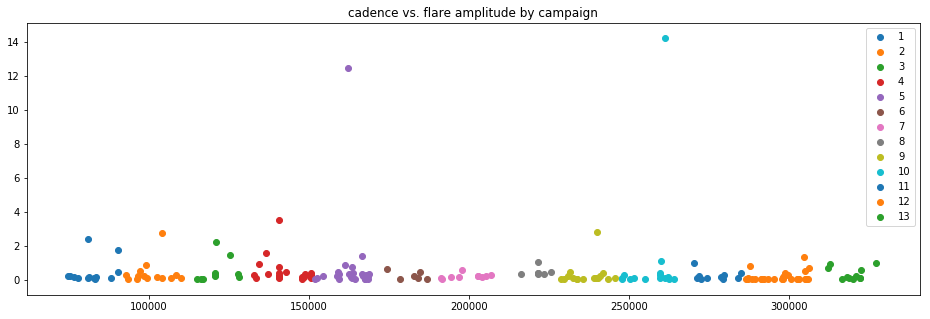

In [11]:
plt.figure(figsize=(16,5))
for c, dfs in df.groupby("Campaign"):
    plt.scatter(dfs.cstart, dfs.ampl_rec, label=c)
plt.legend()
plt.title("cadence vs. flare amplitude by campaign");
#plt.yscale("log")


In [13]:
df.shape

(188, 11)